In [20]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from pylab import rcParams

%matplotlib inline

In [21]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [22]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,10000.0,8383.407700,4859.019020,0.000000,4169.500000,8394.500000,12592.500000,1.679800e+04
DistrictId,10000.0,50.400800,43.587592,0.000000,20.000000,36.000000,75.000000,2.090000e+02
Rooms,10000.0,1.890500,0.839512,0.000000,1.000000,2.000000,2.000000,1.900000e+01
Square,10000.0,56.315775,21.058732,1.136859,41.774881,52.513310,65.900625,6.410652e+02
LifeSquare,7887.0,37.199645,86.241209,0.370619,22.769832,32.781260,45.128803,7.480592e+03
KitchenSquare,10000.0,6.273300,28.560917,0.000000,1.000000,6.000000,9.000000,2.014000e+03
Floor,10000.0,8.526700,5.241148,1.000000,4.000000,7.000000,12.000000,4.200000e+01
HouseFloor,10000.0,12.609400,6.775974,0.000000,9.000000,13.000000,17.000000,1.170000e+02
HouseYear,10000.0,3990.166300,200500.261427,1910.000000,1974.000000,1977.000000,2001.000000,2.005201e+07
Ecology_1,10000.0,0.118858,0.119025,0.000000,0.017647,0.075424,0.195781,5.218671e-01


In [23]:
# сохраню названия признаков
columns = data_train.columns

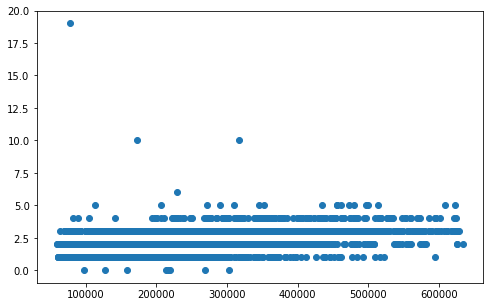

In [32]:
rcParams['figure.figsize'] = 8, 5

x = data_train['Price']
y = data_train['Rooms']

plt.scatter(x, y)
plt.show()

In [31]:
df_x = pd.DataFrame(x)
df_y = pd.DataFrame(y)

df = pd.concat([df_x, df_y], axis=1)

df.corr()


,Price,Rooms
Price,1.000000,0.550291
Rooms,0.550291,1.000000


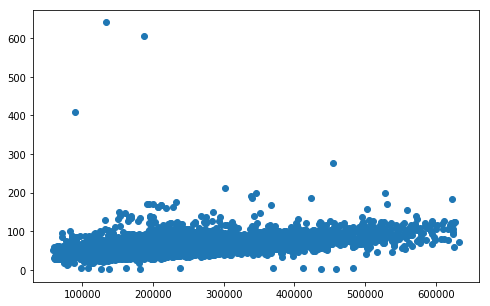

In [33]:
x = data_train['Price']
y = data_train['Square']

plt.scatter(x, y)
plt.show()

In [34]:
df_x = pd.DataFrame(x)
df_y = pd.DataFrame(y)

df = pd.concat([df_x, df_y], axis=1)

df.corr()


,Price,Square
Price,1.000000,0.520075
Square,0.520075,1.000000


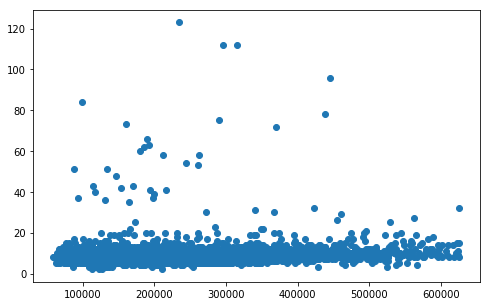

In [40]:
x = data_train[(data_train['KitchenSquare'] < 250) & (data_train['KitchenSquare'] > 1)]['Price']
y = data_train[(data_train['KitchenSquare'] < 250) & (data_train['KitchenSquare'] > 1)]['KitchenSquare']

plt.scatter(x, y)
plt.show()

(array([14., 58., 60., 41., 17., 10.,  5.]),
 array([126840.38589389, 177690.49342413, 228540.60095437, 279390.70848461,
        330240.81601485, 381090.92354509, 431941.03107533, 482791.13860557]),
 <a list of 7 Patch objects>)

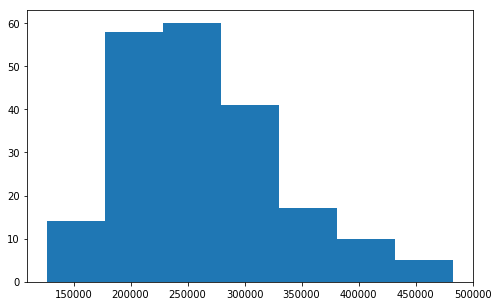

In [57]:
x = data_train['DistrictId'].unique()
y = data_train.groupby('DistrictId')['Price'].mean()

# plt.scatter(x, y)
# plt.show()
plt.hist(y, bins=7)

In [56]:
df_x = pd.DataFrame(x)
df_y = pd.DataFrame(y)

df = pd.concat([df_x, df_y], axis=1)

df.corr()


,0,Price
0,1.00000,0.24678
Price,0.24678,1.00000
